# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows's
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [98]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


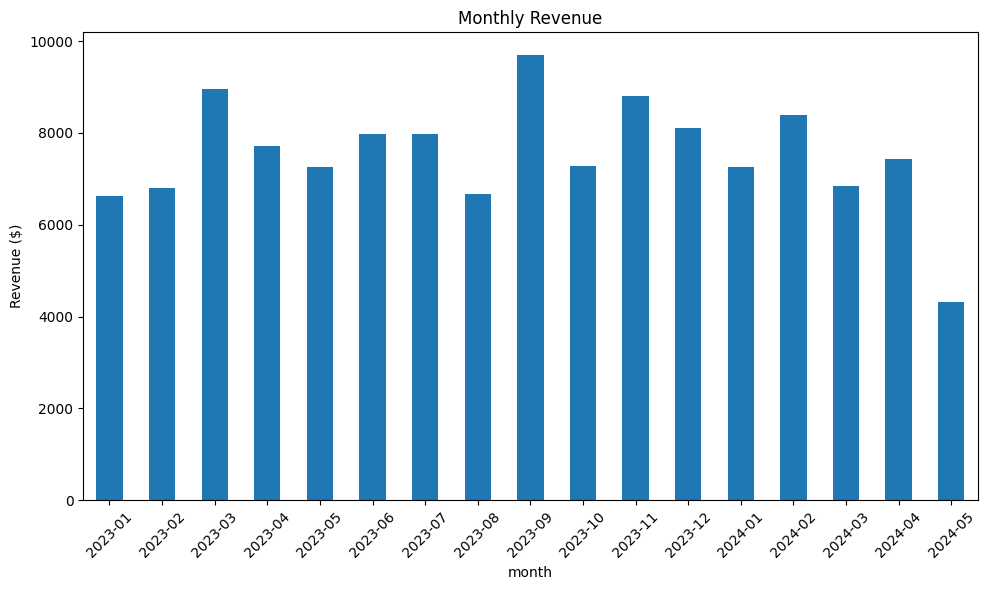

In [99]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [100]:
# Revenue by month of the last quarter
print("Last Quarter (3 months) Revenue:")
#grouping and summing revenues for separate months
grouped = data.groupby("month", as_index=False)["revenue"].sum()
#sorting revenue by months in descending order - most recent on top
grouped = grouped.sort_values(by="month", ascending=False)
last_quarter = grouped.head(3)
print(last_quarter)
total_revenue_quarter = last_quarter["revenue"].sum()
print("Total Revenue for the Quarter:", total_revenue_quarter)
# Since we need quarter results I summed up most recent 3 months to get quarter report

Last Quarter (3 months) Revenue:
      month  revenue
16  2024-05  4314.71
15  2024-04  7430.29
14  2024-03  6835.73
Total Revenue for the Quarter: 18580.73


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [101]:
top_cust = data.groupby("customer_id")["revenue"].sum()
top_cust_df = top_cust.reset_index()
groupped_and_sorted = top_cust_df.sort_values(by="revenue", ascending=False).head(5)

print("Top 5 Customers with highest revenue contributions:")
print(groupped_and_sorted)
#

Top 5 Customers with highest revenue contributions:
    customer_id  revenue
60           62  4448.39
22           24  3369.44
88           90  2976.78
90           92  2838.74
95           97  2835.62


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [102]:
avg_seg_analysis = data.groupby("customer_segment")["revenue"].mean()
avg_seg_df = avg_seg_analysis.reset_index()
print(avg_seg_df)

  customer_segment     revenue
0     Professional  255.652674
1           Senior  262.133925
2          Student  253.812087


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [103]:
reg_rev = data.groupby("region")["revenue"].sum()
reg_rev_df = reg_rev.reset_index()
sorted_reg_rev = reg_rev_df.sort_values(by="revenue", ascending=False).head(1)
print("Highest total revenue generated by:")
print(sorted_reg_rev)

avg_order_region = data.groupby("region")["revenue"].mean()
avg_order_region_df = avg_order_region.reset_index()
avg_order_region_df = avg_order_region_df.sort_values(by="revenue", ascending=False).head(1)
print("This region has highest average order size:")
print(avg_order_region_df)



Highest total revenue generated by:
  region   revenue
2  South  34839.45
This region has highest average order size:
  region     revenue
2  South  274.326378


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [104]:
quant = data.groupby("product_category")["quantity"].sum()
quant_df = quant.reset_index()
sorted_quant = quant_df.sort_values(by="quantity", ascending=False).head(1)
print("Most popular category by quantity: ")
print(sorted_quant)


pop_rev = data.groupby("product_category")["revenue"].sum()
rev_df = pop_rev.reset_index()
sorted_rev = rev_df.sort_values(by="revenue", ascending=False).head(1)
print("Most popular category by revenue: ")
print(sorted_rev)

Most popular category by quantity: 
  product_category  quantity
3             Home       269
Most popular category by revenue: 
  product_category   revenue
3             Home  29871.47


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [105]:
#separating discounted and not-discounted items into separate batches
disc = data[data["discount_applied"] != 0]
disc_med_rev = disc["revenue"].median()
not_disc = data[data["discount_applied"] == 0]
not_disc_med_rev = not_disc["revenue"].median()
print("Median revenue for orders that are Discounted:")
print(disc_med_rev)
print("Median revenue for orders that are Not-Discounted:")
print(not_disc_med_rev)

if disc_med_rev > not_disc_med_rev:
    print("Discounted orders yield higher revenue per order than those without discounts.")
else:
    print("Orders without discounts yield higher revenue per order than with discounts.")


Median revenue for orders that are Discounted:
219.24
Median revenue for orders that are Not-Discounted:
178.98
Discounted orders yield higher revenue per order than those without discounts.


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [106]:
# Count orders per payment method
pay_cnt = data["payment_method"].value_counts()

pay_pcnt = (pay_cnt / len(data)) * 100

print("Percentage of orders by payment method:")
print(pay_pcnt)
#Customers prefer to pay for their orders using credit cards which is expected. Customers suprisingly use PayPal a lot as a payment method
#even after PayPal's controversy with it's Honey browser extension.

Percentage of orders by payment method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: count, dtype: float64


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Revenue by Day of Week:
  day_of_week  revenue
0      Monday  171.130
1     Tuesday  199.735
2   Wednesday  184.840
3    Thursday  164.040
4      Friday  205.580
5    Saturday  253.240
6      Sunday  190.060


/tmp/ipykernel_6743/3906812008.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_revenue = data.groupby("day_of_week")["revenue"].median().reset_index()


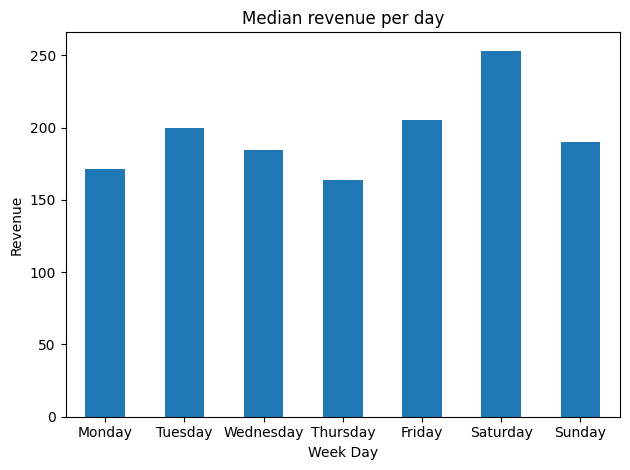

In [107]:
# making sure that days of the week are displayed in correct order for convinience
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["day_of_week"] = pd.Categorical(data["day_of_week"], categories=week_order, ordered=True)

#grouping and finding medina revenue for each day of the week
day_of_week_revenue = data.groupby("day_of_week")["revenue"].median().reset_index()
day_of_week_revenue = day_of_week_revenue.sort_values("day_of_week")
print("Revenue by Day of Week:")
print(day_of_week_revenue)

#plotting
day_of_week_revenue.plot(
    kind="bar",
    x="day_of_week",
    y="revenue",
    title="Median revenue per day",
    legend=False
)
plt.ylabel("Revenue")
plt.xlabel("Week Day")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#Friday and Saturday are the most profitable days on average during the week. That signalizes that customers are more prone to make a purchase
#during their free off work time

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [108]:
#profit margin 20%
pay_cnt = data["revenue"].sum()
print("Grand total revenue is: "+ str(pay_cnt) + "$")
print("Pure profit (20%) is: " + str(0.2*pay_cnt) + "$")

#most profitable region
reg_rev = data.groupby("region")["revenue"].sum()
reg_rev_df = reg_rev.reset_index()
sorted_reg_rev = reg_rev_df.sort_values(by="revenue", ascending=False).head(1)
top_region_revenue = sorted_reg_rev["revenue"].iloc[0]

print("Highest total revenue generated by:")
print(sorted_reg_rev)

print("Pure profit from region: " + sorted_reg_rev["region"].iloc[0] + ", is " + str(top_region_revenue * 0.2) + "$")


Grand total revenue is: 128140.67$
Pure profit (20%) is: 25628.134000000002$
Highest total revenue generated by:
  region   revenue
2  South  34839.45
Pure profit from region: South, is 6967.889999999999$


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

### "There are things than we can change (promotions, discounts, availability) and which we don't (days of the week when customers usually buy). So One of the strategies is introduction of progressive discounts (buy by the bulk for less). Also a good decision might be more agressive advertisement in Western region due to its substantial lagging behind on several charts."

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.